# Group assignment 1.4 Distribution fitting

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Patricia Mares Nasarre, Robert Lanzafame, and Max Ramgraber*

*Due: Friday, September 26th 2025.*

## Case 1: Wind gust factor in Delft

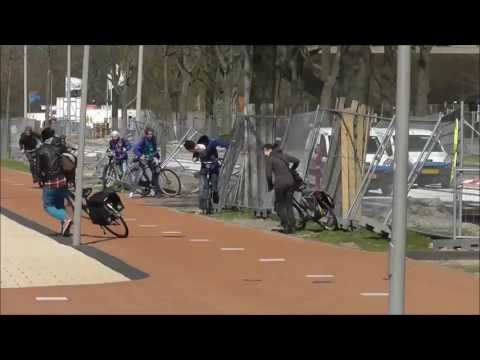

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('U6QtxJNhiog', width=800, height=600)

**What's the propagated uncertainty? *How large is the wind gust factor?***

In this project, you have chosen to work on the uncertainty of of the wind gust fraction at 10m height in Delft. You have observations of the wind gust speed $G$ [m/s] and the baseline wind speed $v$ [m/s] every hour for the entire month of August 2025. The data has been accessed from [here](https://open-meteo.com/en/docs/historical-weather-api). The wind gust factor $F$ [-] is computed as the fraction

$$
F = \frac{G}{v}
$$

As you may have experienced yourself, the Netherlands can be a pretty windy place. The wind gust factor quantifies by what factor the wind gust top speeds exceed the base wind speed.

**The goal of this project is:**
1. Choose a reasonable distribution function for $G$ and $v$.
2. Fit the chosen distributions to the observations of $G$ and $v$.
3. Assuming $G$ and $v$ are independent, propagate their distributions to obtain the distribution of $F$.
4. Analyze the distribution of $F$.

## Importing packages

In [2]:
import numpy as np              # For math
import matplotlib.pyplot as plt # For plotting
from scipy import stats         # For math
from math import ceil, trunc    # For plotting

# This is just cosmetic - it updates the font size for our plots
plt.rcParams.update({'font.size': 14})

## 1. Explore the data

The first step in the analysis is exploring the data, visually and through statistics. 

Tip: In the workshop files, you have used the pandas `.describe()` function to obtain the statistics of a data vector. `scipy.stats` has a similar function.

In [3]:
import os
from urllib.request import urlretrieve

def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/GA1.4/'+fname, fname)

findfile('dataset_wind_gusts.csv')

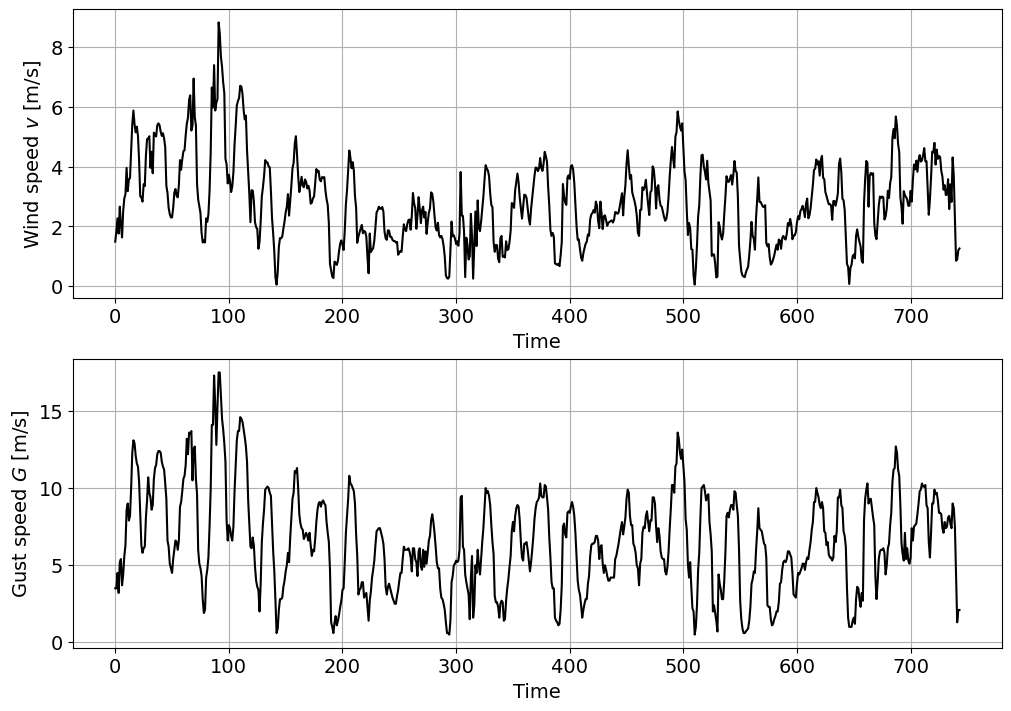

In [4]:
# Import the data from the .csv file
v, G = np.genfromtxt('dataset_wind_gusts.csv', delimiter=",", unpack=True, skip_header=True)

# Plot the time series for the wind speed v
fig, ax = plt.subplots(2, 1, figsize=(10, 7), layout = 'constrained')
ax[0].plot(v,'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Wind speed $v$ [m/s]')
ax[0].grid()

# Plot the time series for the wind gust speed G
ax[1].plot(G,'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Gust speed $G$ [m/s]')
ax[1].grid()

In [5]:
# Statistics for v
print(stats.describe(v))

DescribeResult(nobs=744, minmax=(np.float64(0.05), np.float64(8.83)), mean=np.float64(2.8318817204301077), variance=np.float64(1.9896072215227423), skewness=np.float64(0.6355429263956981), kurtosis=np.float64(0.6572280584540016))


In [6]:
# Statistics for G
print(stats.describe(G))

DescribeResult(nobs=744, minmax=(np.float64(0.5), np.float64(17.5)), mean=np.float64(6.538575268817204), variance=np.float64(10.18517212622469), skewness=np.float64(0.3777255226470491), kurtosis=np.float64(-0.01348835235383472))


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>

Describe the data based on the previous statistics:
- Which variable features a higher variability? Also consider the magnitudes of the different variables.
- What does the skewness coefficient represent? Which kind of distribution functions should we consider to fit based on this coefficient?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution:</b>

- Both variables have similar means (with the mean of $G$ being naturally larger) but different variances. To compare the variability of variables with different magnitudes, it can be useful to compute the <b>coefficient of variation</b>, which normalizes the standard deviation against the mean. If we do so, we obtain $CV(v)=\sigma/\mu=\sqrt{1.990}/2.832 = 0.498$ and $CV(G)=\sigma/\mu= \sqrt{10.185}/6.539 = 0.488$. Thus, we can see that $v$ and $G$ have approximately similar variability.
- Both $v$ and $G$ have a positive non-zero skewness, but the one for $v$ is a bit higher. Thus, the data presents a right tail and mode < median < mean. An appropriate distribution for $H$ and $G$ would be one which: (1) is bounded in 0 (no negative values of $H$ or $T$ are physically possible), and (2) has a positive tail. If we consider the distributions that you have been introduced to, the Lognormal, Gumbel, beta, or Exponential distributions would be possibilities.

</div>
</div>

## 2. Empirical distribution functions

Now, we are going to compute and plot the empirical PDF and CDF for each variable. Note that you have the pseudo-code for the empirical CDF in the [reader](https://mude.citg.tudelft.nl/book/2025/univariate_distributions/empirical.html).

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>  
 
Define a function to compute the empirical CDF. Plot your empirical PDF and CDF.
</p>
</div>

In [7]:
def ecdf(observations):
    """Write a function that returns [non_exceedance_probabilities, sorted_values]."""
    sorted_values = np.sort(observations)
    n = sorted_values.size
    non_exceedance_probabilities = np.arange(1, n+1) / (n + 1)
    return [non_exceedance_probabilities, sorted_values]

In [8]:
# def ecdf(YOUR_CODE_HERE):
#     """Write a function that returns [non_exceedance_probabilities, sorted_values]."""
#     YOUR_CODE_HERE # may be more than one line
#     return [non_exceedance_probabilities, sorted_values]

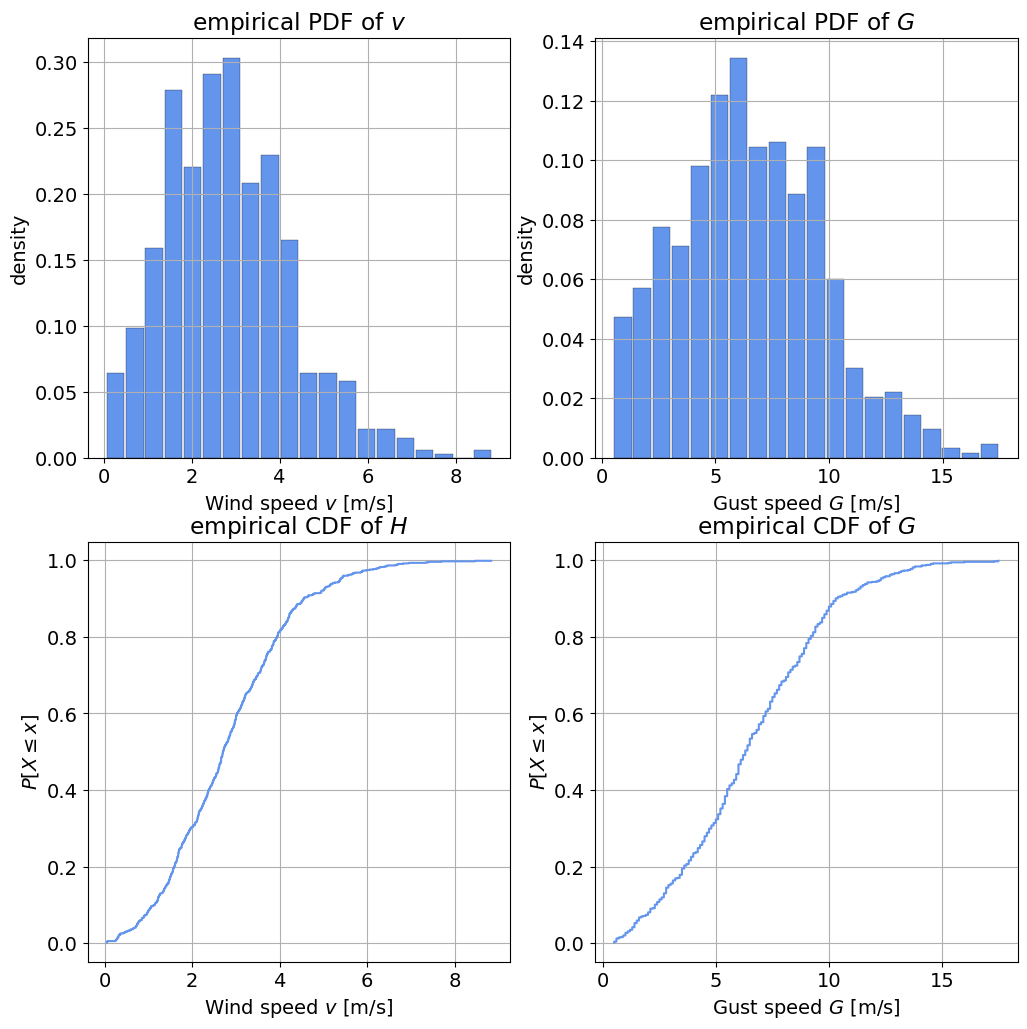

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the PDF of v
axes[0,0].hist(v, edgecolor='k', linewidth=0.2, rwidth = 0.9,
             color='cornflowerblue', density = True, bins = 20)
axes[0,0].set_xlabel('Wind speed $v$ [m/s]')
axes[0,0].set_ylabel('density')
axes[0,0].set_title('empirical PDF of $v$')
axes[0,0].grid()

# Plot the PDF of G
axes[0,1].hist(G, edgecolor='k', linewidth=0.2, rwidth = 0.9,
             color='cornflowerblue', density = True, bins = 20)
axes[0,1].set_xlabel('Gust speed $G$ [m/s]')
axes[0,1].set_ylabel('density')
axes[0,1].set_title('empirical PDF of $G$')
axes[0,1].grid()

# Plot the empirical CDF of v
axes[1,0].step(ecdf(v)[1], ecdf(v)[0], 
             color='cornflowerblue')
axes[1,0].set_xlabel('Wind speed $v$ [m/s]')
axes[1,0].set_ylabel(r'${P[X \leq x]}$')
axes[1,0].set_title('empirical CDF of $H$')
axes[1,0].grid()

# Plot the empirical CDF of G
axes[1,1].step(ecdf(G)[1], ecdf(G)[0], 
             color='cornflowerblue', label='Gust speed $G$ [m/s]')
axes[1,1].set_xlabel('Gust speed $G$ [m/s]')
axes[1,1].set_ylabel(r'${P[X \leq x]}$')
axes[1,1].set_title('empirical CDF of $G$')
axes[1,1].grid()

In [10]:
### YOUR PLOTS HERE ###

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

Based on the results of Task 1 and the empirical PDF and CDF, select <b>one</b> distribution to fit to each variable. 
- For $v$, select between a lognormal or exponential distribution.</li>
- For $G$ choose between a Gaussian or beta distribution.</li>

</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<b>Solution:</b>

$v$: lognormal - Reasoning: both distributions have a right tail and a left bound, but the mode of the PDF is not at the left bound.

$G$: beta - Reasoning: the distribution has a positive skewness, indicating that it is not symmetric; furthermore, a Gaussian distribution has no bounds and so may permit unphysical negative values.

</div>
</div>

## 3. Fitting a distribution

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>  
 
Fit the selected distributions to the observations using MLE.
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)'s built-in functions (be careful with the parameter definitions!).

In [11]:
params_v = stats.lognorm.fit(v)
params_G = stats.beta.fit(G)

In [12]:
### YOUR CODE HERE ###

## 4. Assessing goodness of fit

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>  
 
Assess the goodness of fit of the selected distribution using:
- One graphical method: QQplot or Logscale. Choose one.
- The Kolmogorov-Smirnov test.
</p>
</div>

Hint: The Kolmogorov-Smirnov test is implemented in [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html).

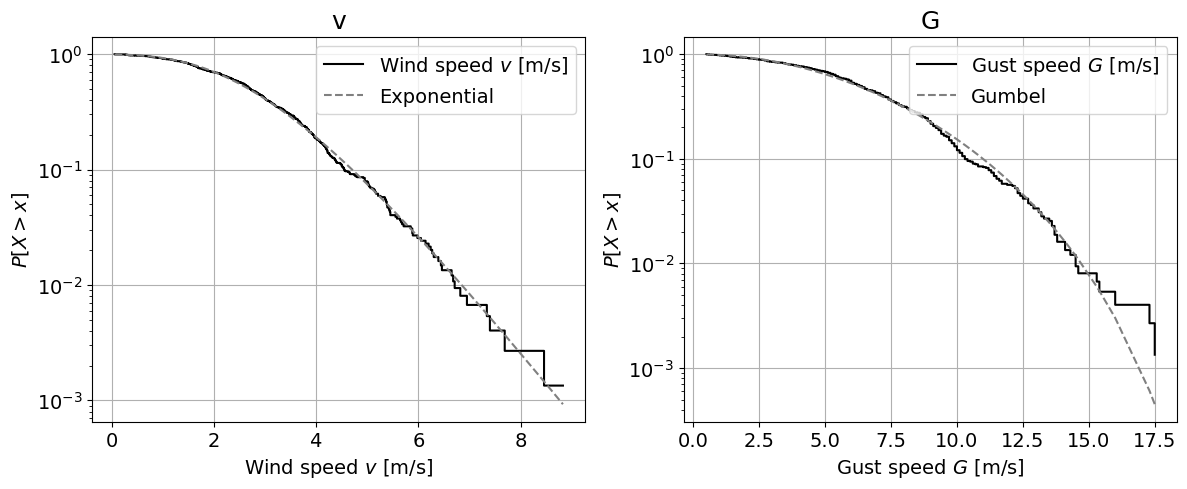

In [13]:
# Graphical method

# Logscale 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].step(ecdf(v)[1], 1-ecdf(v)[0], 
             color='k', label='Wind speed $v$ [m/s]')
axes[0].plot(ecdf(v)[1], 1-stats.lognorm.cdf(ecdf(v)[1], *params_v),
             '--', color = 'grey', label='Exponential')
axes[0].set_xlabel('Wind speed $v$ [m/s]')
axes[0].set_ylabel('${P[X > x]}$')
axes[0].set_title('v', fontsize=18)
axes[0].set_yscale('log')
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(G)[1], 1-ecdf(G)[0], 
             color='k', label='Gust speed $G$ [m/s]')
axes[1].plot(ecdf(G)[1], 1-stats.beta.cdf(ecdf(G)[1], *params_G),
             '--', color = 'grey', label='Gumbel')
axes[1].set_xlabel('Gust speed $G$ [m/s]')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('G', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

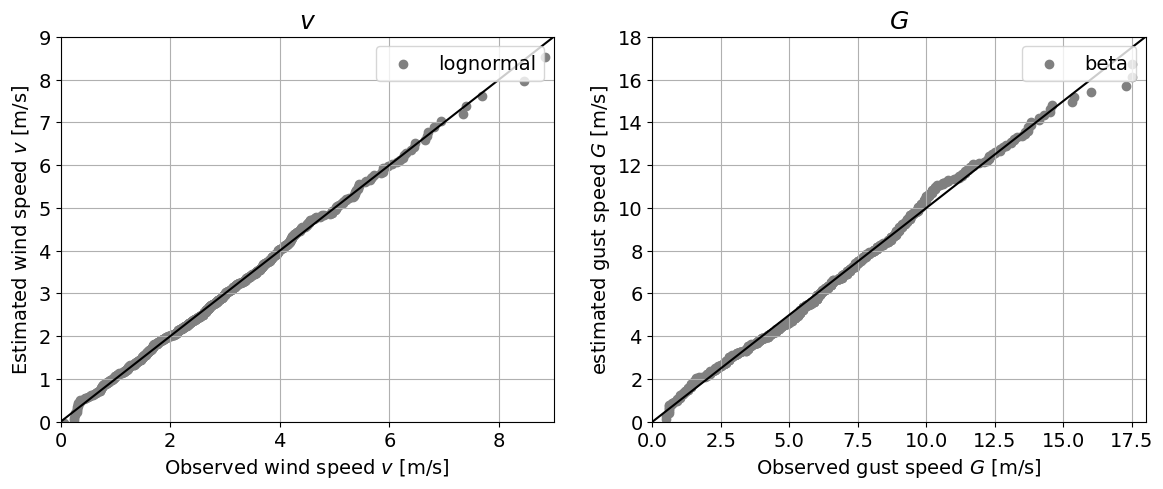

In [14]:
# QQ plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot([trunc(min(v)), ceil(max(v))], [trunc(min(v)), ceil(max(v))], 'k')
axes[0].scatter(ecdf(v)[1], stats.lognorm.ppf(ecdf(v)[0], *params_v), 
             color='grey', label='lognormal')
axes[0].set_xlabel('Observed wind speed $v$ [m/s]')
axes[0].set_ylabel('Estimated wind speed $v$ [m/s]')
axes[0].set_title('$v$', fontsize=18)
axes[0].set_xlim([trunc(min(v)), ceil(max(v))])
axes[0].set_ylim([trunc(min(v)), ceil(max(v))])
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].plot([trunc(min(G)), ceil(max(G))], [trunc(min(G)), ceil(max(G))], 'k')
axes[1].scatter(ecdf(G)[1], stats.beta.ppf(ecdf(G)[0], *params_G), 
             color='grey', label='beta')
axes[1].set_xlabel('Observed gust speed $G$ [m/s]')
axes[1].set_ylabel('estimated gust speed $G$ [m/s]')
axes[1].set_title('$G$', fontsize=18)
axes[1].set_xlim([trunc(min(G)), ceil(max(G))])
axes[1].set_ylim([trunc(min(G)), ceil(max(G))])
axes[1].legend(loc = "upper right")
axes[1].grid()

In [15]:
### YOUR PLOTS HERE ###

In [16]:
# KS test
_, p_v = stats.kstest(v,stats.lognorm.cdf, args=params_v)
_, p_G = stats.kstest(G,stats.beta.cdf, args=params_G)

print('The p-value for the fitted distribution to v is:', round(p_v, 3))
print('The p-value for the fitted distribution to G is:', round(p_G, 3))

The p-value for the fitted distribution to v is: 0.579
The p-value for the fitted distribution to G is: 0.089


In [17]:
### YOUR CODE HERE ###

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>  
 
Interpret the results of the GOF techniques. How does the selected parametric distribution perform?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- <b>Logscale plot</b>: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. For $v$, the lognormal distribution fits very well in the tail. The beta distribution for $G$ also yields an acceptable fit, but deviates from the empirical distributions in the right tail. Specifically, it underpredicts the exceedance probability of high wind speeds, which may lead to an underestimation of the risk of high wind speeds.
- <b>QQplot</b>: Here, we can see that the fit of the parametric distribution to the empirical distribution is very good in both cases, with the only exception being the tails, as discussed in the logscale plot.
- <b>Kolmogorov-Smirnov test</b>: remember that the test statistic measures the difference between two distributions. The p-value then represents the probability of observing a difference at least that large for a sample from the assumed distribution. If p-value is lower than the significance ($\alpha=0.05$, for instance), the null hypothesis is rejected. Considering here $\alpha=0.05$, we *cannot* reject the hypothesis that $v$ comes from a lognormal distribution, or that $G$ comes from a beta distribution.
</div>
</div>

## 5. Propagating the uncertainty

Using the fitted distributions, we are going to propagate the uncertainty from $v$ and $G$ to $F$ with a Monte Carlo approach **assuming that $v$ and $G$ are independent**.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   
    
1. Draw 10,000 random samples from the fitted distribution functions for $v$ and $G$.
    
2. Compute $F$ for each pair of the generated samples.
    
3. Compute $F$ for the observations.
    
4. Plot the PDF and exceedance curve in logscale of $F$ computed using both the simulations and the observations.

<b>Hint: </b>The distributions you have chosen may generate $v$ or $G$ values close to zero or even negative. Since you are computing a fraction, this may cause numerical issues. A hack to avoid that might be to set all values below a threshold, say, $0.1$ [m/s] to the threshold value. 
</p>
</div>

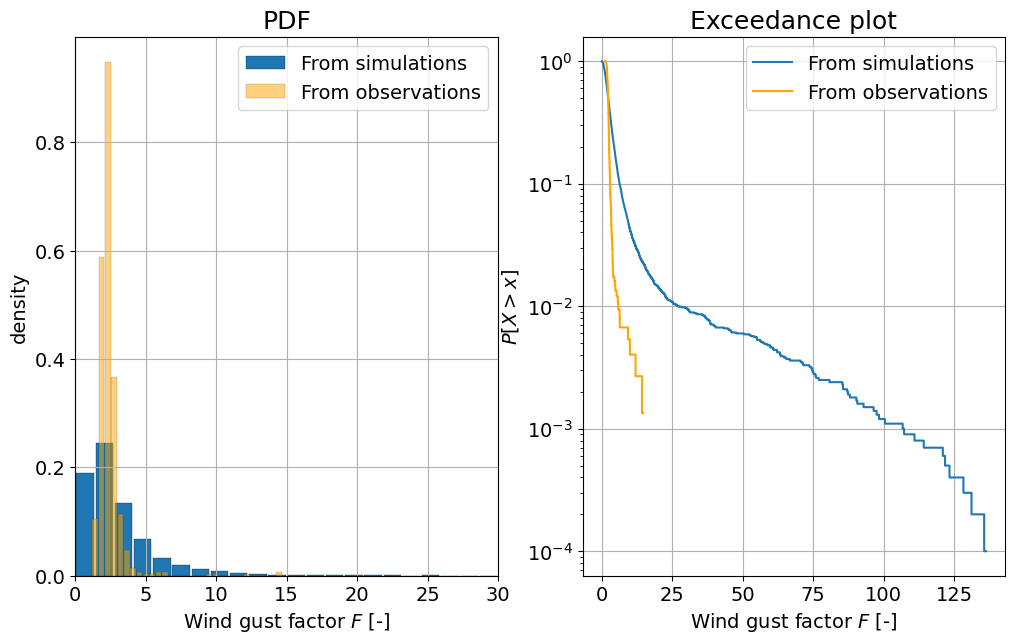

In [18]:
# Here, the solution is shown for the Lognormal distribution

# Draw random samples
rs_v = stats.lognorm.rvs(*params_v, size = 10000)
rs_G = stats.beta.rvs(*params_G, size = 10000)

# Threshold the values
rs_v = np.maximum(rs_v, 0.1)
rs_G = np.maximum(rs_G, 0.1)

# Compute F
rs_F = rs_G / rs_v

# Repeat for observations
F = G / v

# Plot the PDF and the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].hist(rs_F, edgecolor='k', linewidth=0.2, density = True, label = 'From simulations', bins = 100, rwidth = 0.9)
axes[0].hist(F, edgecolor='k', facecolor = 'orange', alpha = 0.5, linewidth=0.2, rwidth = 0.9, density = True, label = 'From observations', bins = 30)
axes[0].set_xlabel('Wind gust factor $F$ [-]')
axes[0].set_ylabel('density')
axes[0].set_xlim([0,30])
axes[0].set_title('PDF', fontsize=18)
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(rs_F)[1], 1-ecdf(rs_F)[0], label = 'From simulations')
axes[1].step(ecdf(F)[1], 1-ecdf(F)[0], color = 'orange', label = 'From observations')
axes[1].set_xlabel('Wind gust factor $F$ [-]')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('Exceedance plot', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

In [19]:
# Draw random samples
rs_v = ### YOUR CODE HERE ###
rs_G = ### YOUR CODE HERE ###

# Compute F
rs_F = ### YOUR CODE HERE ###

# Repeat for observations
F = ### YOUR CODE HERE ###

# Plot the PDF and the CDF

SyntaxError: invalid syntax (2313016292.py, line 2)

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>   

Interpret the figures above, answering the following questions:
- Are there differences between the two computed distributions for $F$?
- What are the advantages and disadvantages of using the simulations?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- In the PDF plot, we can see significant differences in the observed and simulated distributions for $F$. The observed distribution is much narrower, and has wind gust factors that start at $1$ and go into the tens. By contrast, the simulated distribution for $F$ includes values below $1$, which should not be possible: the gust speed cannot be lower than the wind speed, so we should always have $F \geq 1$.
- Similarly, we can see in both the PDF and CDF plots that the simulated wind gust factors are dramatically larger than the observed ones. This includes unrealistically large factors, some even reaching beyond 100, which seems scarcely physically possible.
- <b>Disadvantages:</b> we are assuming that $v$ and $G$ are independent (we will see how to address this issue next week). In the case of the wind gust factor, intuition might already tell us that there should be a dependence between the variables. Neglecting this dependence yields the weird simulated results we have seen above. <b>Advantages:</b> I can draw all the samples I want allowing the computation of events I have not observed yet (extreme events; here, perhaps, even too extreme =P).
</div>
</div>

If you run the code in the cell below, you will obtain a scatter plot of both variables. Explore the relationship between both variables and answer the following questions:

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   
    
1. Observe the plot below. What differences do you observe between the generated samples and the observations?
    
2. What can you improve into the previous analysis? Do you have any ideas/suggestions on how to implement those suggestions?
</p>
</div>

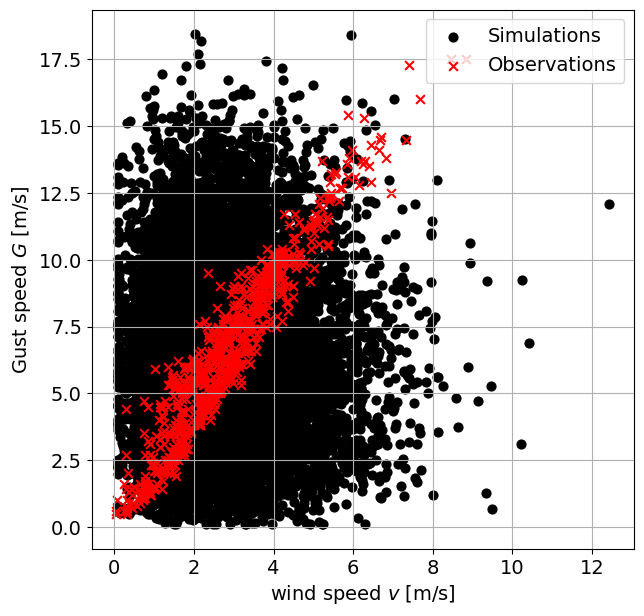

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.scatter(rs_v, rs_G, 40, 'k', label = 'Simulations')
axes.scatter(v, G, 40, 'r', marker = 'x', label = 'Observations')
axes.set_xlabel('wind speed $v$ [m/s]')
axes.set_ylabel('Gust speed $G$ [m/s]')
axes.legend(loc = "upper right")
axes.grid()
plt.savefig("scatterplot.png",dpi=300)

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- As may be expected, the observations are focussed along a thin band, indicating strong positive correlation. By contrast, the simulations are spread much more broadly, freely combining wind and gust speeds of different velocities. This is a consequence of the assumption of independence in the simulations. </li>
- There is a correlation of $0.953$ between the observed $v$ and $G$, indicating a strong (physical) dependence between the variables. On the contrary, as expected, no significant correlation is observed between the generated samples.
- <b>Some suggestions:</b> The fit got $v$ was already excellent, and also choosing a lognormal distribution for $G$ might yield better results (we limited ourselves to a beta distribution here for the sake of the exercise). Accounting for the dependence between the two variables is an absolute must. </li>
</div>

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>